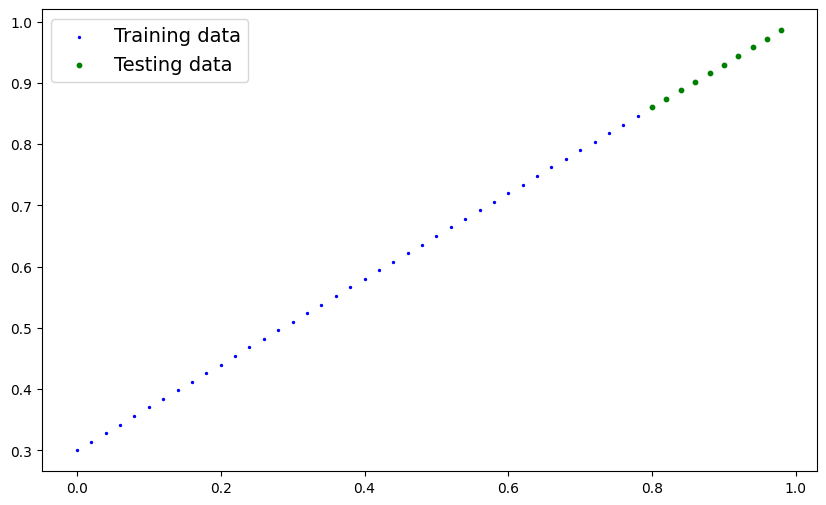

In [82]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#known parameters
weight = 0.7
bias = 0.3

#create range of numbers
start = 0 
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions
    """
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c="b", s=2, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size":14})

plot_predictions()

In [83]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    #Forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [84]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [85]:
#Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

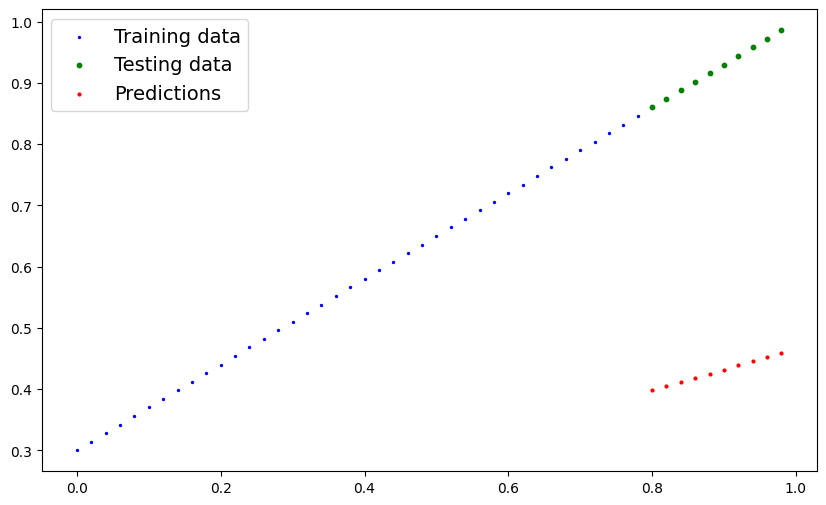

In [86]:
plot_predictions(predictions=y_preds)

## Training model
Using loss functions in order to determine how far away our predictions are.

The lower the output of your loss function, the better.

Optimizer takes into account the loss of a model and adjusts the model's weights anad biases


In [87]:
#Loss function
loss_fn = nn.L1Loss()

#Optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

## Building a training and testing loop

- Loop through the data and do all these steps:
- Forward pass (Moves data through the model using the forward function) to make predictions on data
- Calculate the loss (Compare forward pass predictions to ground truth labels)
- Optimizer zero grad
- Loss backward (Moves backwards through network in order to calculate the gradients of each parameter with respect to the loss) (**Back propogation**)
- Optimizer step uses the optimzer to adjust our model's parameters to try and find the lowest cost (**Gradient Descent**)

In [88]:
#An epoch is one loop through the data (It is a hyperparameter)
epochs = 10


#Training
#Loop through data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() #train mode sets all paramters that require gradients to require gradients
    #Forward pass
    y_preds = model_0(X_train)

    #Calculate loss
    loss = loss_fn(y_preds, y_train) #(input data, output data)

    #Optimzer zero grad
    optimizer.zero_grad()

    #Perform backpropagation on the loss with respect to parameters of the model
    loss.backward()

    #Perform gradient descent
    optimizer.step()

    model_0.eval() #turns off gradient tracking

In [ ]:
# 6:35:46